<h3> Representations

In [1]:
from CGRepresentation import CGR

<h4> Example1: Nucleotide (DNA) sequence

In [2]:
seq = CGR("AATGC", seq_type = "DNA")

In [3]:
print(seq.representation())

[[ 0.       0.     ]
 [-0.5     -0.5    ]
 [-0.75    -0.75   ]
 [ 0.125    0.125  ]
 [ 0.5625  -0.4375 ]
 [-0.21875  0.28125]]


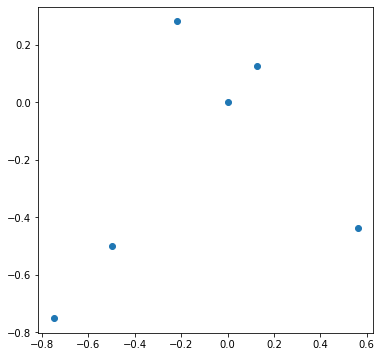

In [4]:
seq.plot()

In [5]:
seq.save_representation("seq1.txt")

<h4> Example2: Nucleotide (RNA) sequence where secondary structure specified

In [6]:
seq = CGR("AUGCUCAUGCAAAA", seq_type = "RNA", rna_2structure = ".(((....)))...")

In [7]:
print(seq.representation())

[[ 0.          0.        ]
 [-0.5        -0.5       ]
 [-0.25       -0.25      ]
 [-0.125      -0.125     ]
 [-0.0625     -0.0625    ]
 [ 0.46875     0.46875   ]
 [-0.265625    0.734375  ]
 [-0.6328125  -0.1328125 ]
 [ 0.18359375  0.43359375]
 [ 0.09179688  0.21679688]
 [ 0.04589844  0.10839844]
 [ 0.02294922  0.05419922]
 [-0.48852539 -0.47290039]
 [-0.7442627  -0.7364502 ]
 [-0.87213135 -0.8682251 ]]


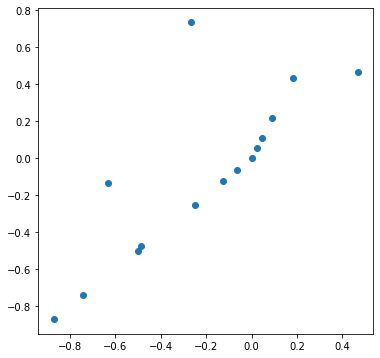

In [8]:
seq.plot()

<h4> Example3: Protein sequence, where coordinates for amino acids are described by the hydrophobicity and hydrophilicity

In [9]:
seq = CGR("ATMGGAC", seq_type = "protein")

In [10]:
print(seq.representation())

[[ 3.33066907e-17 -2.15000000e-01]
 [ 2.02500000e-01 -3.57500000e-01]
 [ 7.62500000e-02 -3.78750000e-01]
 [ 3.58125000e-01 -8.39375000e-01]
 [ 4.19062500e-01 -4.19687500e-01]
 [ 4.49531250e-01 -2.09843750e-01]
 [ 5.34765625e-01 -3.54921875e-01]
 [ 4.12382812e-01 -6.77460938e-01]]


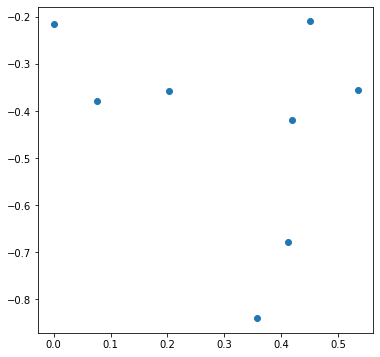

In [11]:
seq.plot()

<h4> Example4: Protein sequece, where coordinates for amino acids are provided.

In [12]:
import numpy as np
outer_coordinates = np.array([[-3.5599, -0.5085], [-1.2860, -2.3100], [ 0.2950, -0.2534], [-0.4976,  0.6625], [ 0.0602, -1.6506], [-1.3501, -0.9420],[ 0.1233,  0.4319], [ 0.0633, -0.0236], [-0.2673, -0.9768], [ 0.0366, -0.1975], [ 0.8036,  1.5332], [-0.7423,  1.1636], [-0.7040,  1.6346], [ 0.8649,  1.6586], [-1.9871, -0.3538], [-1.3925,  0.1445], [-0.3567,  0.2208], [ 0.6367, -0.8906], [-1.2948,  0.2578], [-0.0574,  0.5357]])
seq = CGR("ATMGGAC", seq_type = "protein", outer_representation = outer_coordinates)

In [13]:
print(seq.representation())

[[-0.530605    0.00682   ]
 [-1.77654    -0.25084   ]
 [-1.06662    -0.01502   ]
 [-0.13151     0.75909   ]
 [-0.740805   -0.091455  ]
 [-1.0454525  -0.5167275 ]
 [-2.30267625 -0.51261375]
 [-1.79433813 -1.41130687]]


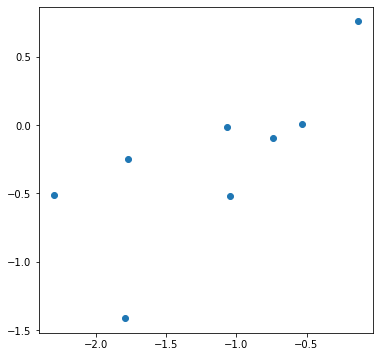

In [14]:
seq.plot()

<h3> Phylogenetic trees construction ($CGR \rightarrow DFT\rightarrow UPGMA$)

In [15]:
from CGRtree import DFTree

<h4> Example5 (ND5 protein)

In [16]:
#open FASTA file

import re
f = open("nd5p.txt")
t = f.read()
f.close()
l = re.findall("(>.*)\n([A-Zn\n]*)", t)

names = [a.split("/")[0][1:] for a,b in l]
sequences = [b.replace("\n","") for a,b in l]

In [17]:
print(names)

['human', 'gorilla', 'pygmy.chimpanzee', 'common.chimpnazee', 'fin.whale', 'blue.whale', 'rat', 'mouse', 'opossum']


In [18]:
print(sequences[0]) #nd5 for human (first sequence)

MTMHTTMTTLTLTSLIPPILTTLVNPNKKNSYPHYVKSIVASTFIISLFPTTMFMCLDQEVIISNWHWATTQTTQLSLSFKLDYFSMMFIPVALFVTWSIMEFSLWYMNSDPNINQFFKYLLIFLITMLILVTANNLFQLFIGWEGVGIMSFLLISWWYARADANTAAIQAILYNRIGDIGFILALAWFILHSNSWDPQQMALLNANPSLTPLLGLLLAAAGKSAQLGLHPWLPSAMEGPTPVSALLHSSTMVVAGIFLLIRFHPLAENSPLIQTLTLCLGAITTLFAAVCALTQNDIKKIVAFSTSSQLGLMMVTIGINQPHLAFLHICTHAFFKAMLFMCSGSIIHNLNNEQDIRKMGGLLKTMPLTSTSLTIGSLALAGMPFLTGFYSKDHIIETANMSYTNAWALSITLIATSLTSAYSTRMILLTLTGQPRFPTLTNINENNPTLLNPIKRLAAGSLFAGFLITNNISPASPFQTTIPLYLKLTALAVTFLGLLTALDLNYLTNKLKMKSPLCTFYFSNMLGFYPSITHRTIPYLGLLTSQNLPLLLLDLTWLEKLLPKTISQHQISASIITSTQKGMIKLYFLSFFFPLILTLLLIT


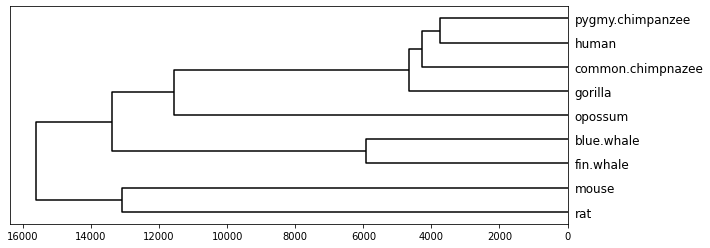

In [19]:
t = DFTree(sequences, names, seq_type = "protein")
t.plot_upgma_tree(save = True)